In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
import pickle
import yaml

In [2]:
def draw_remaining_connections(methods_connections, metric, metric_name, title="Criteo(10K)"):
    xlabel = 'Field number'
    ylabel = 'Number of remaining connections'
    
    fig,ax1 = plt.subplots()
    ax2 = ax1.twinx()
    legend = []
    plots = []
    for method in methods_connections:
        legend.append(method)
        plots.append(ax1.plot(range(len(methods_connections[method])), 
                              methods_connections[method], marker ="o", markersize=4))
    
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
   
    plots.append([ax2.bar(range(len(metric)), metric, 
                          alpha=0.5, color="grey")])
    ins = sum(plots, [])
    plt.legend(ins, legends + [metric_name], loc=1)
    ax2.set_ylabel(metric_name)
    plt.title(title)

def draw_remaining_connections_to_inputs(methods_connections, inputs_to_dnn, title="Criteo(10K)"):
    """draw the the remaining connections of different methods and the absolute mean of the inputs to dnn

    Parameters
    ----------
    methods_connections : a dict
        key : pruning method
        value: the remaning connections of each field with the mehtod
    inputs_to_dnn : a 3-d numpy array
        data input to the DNN in the pruning process
        a 3-d numpy array with shape [number_of_data, number_of_field, embedding_size]
    title : str, optional
        title of the figure, by default "Criteo(mini)"
    """
    abs_mean = np.abs(inputs_to_dnn.mean(axis=(0,-1)))
    draw_remaining_connections(methods_connections, abs_mean, "abs(mean value)", title)

def draw_remaining_connections_to_importance(methods_connections, fe_importances, title="Criteo(10K)"):
    """draw the the remaining connections of different methods and feature importance

    Parameters
    ----------
    methods_connections : a dict
        key : pruning method
        value: the remaning connections of each field with the mehtod
    fe_importances : a numpy array of a list
        feature importance to each field
    title : str, optional
        title of the figure, by default "Criteo(mini)"
    """
    draw_remaining_connections(methods_connections, fe_importances, "feature importance", title)

### Figure 4 for Criteo dataset

In [3]:
# load data for synflow, iSNIP, iGraSP
methods = ['synflow','igrasp', 'isnip']
legends = ['SynFlow', 'iGraSP', 'iSNIP']
emb_size = 32
ratio=0.01
methods_connections = {}
for k,method in enumerate(methods):
    filen = "cache/{}_{}.pkl".format(method, ratio)
    with open(filen, "rb") as f:
        fake = pickle.load(f)
    metrics = fake.reshape(-1, emb_size)
    y = [np.sum(metrics[i]) for i in range(len(metrics))]
    methods_connections[legends[k]] = y
filen = "cache/nn_input_{}_{}.pkl".format("isnip", ratio)
with open(filen, "rb") as f:
    inputs_to_dnn = pickle.load(f)
    inputs_to_dnn = inputs_to_dnn.reshape(inputs_to_dnn.shape[0], -1, emb_size)

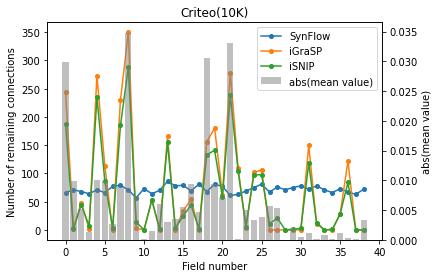

In [4]:
draw_remaining_connections_to_inputs(methods_connections, inputs_to_dnn)

### Figure 12 for Criteo dataset

In [5]:
# load data for our methods
methods = ['fsynflow','fgrasp', 'fsnip', ]
legends = ['FA-SynFlow', 'FA-iGraSP', 'FA-iSNIP']
ratio=0.01
methods_connections = {}
for k,method in enumerate(methods):
    filen = "cache/{}_{}.pkl".format(method, ratio)
    with open(filen, "rb") as f:
        fake = pickle.load(f)
    metrics = fake.reshape(-1, emb_size)
    y = [np.sum(metrics[i]) for i in range(len(metrics))]
    methods_connections[legends[k]] = y

importtance_files = "../data/feat_map.yaml"
def _load_feature_importances(filename):
    with open(filename, "r") as f:
        imp_dict = yaml.safe_load(f)
    values = np.array(list(imp_dict.values()))
    values = values / values.sum()
    index = 0
    for key in imp_dict:
        imp_dict[key] = values[index]
        index += 1
    return imp_dict
imp_dict = _load_feature_importances(importtance_files)
num_cols = ['num_{}'.format(i) for i in range(1, 14)]
cat_cols = ['cat_{}'.format(i) for i in range(1, 27)]
criteo_sample_index = cat_cols + num_cols
imp_arr = [imp_dict[i] for i in criteo_sample_index]

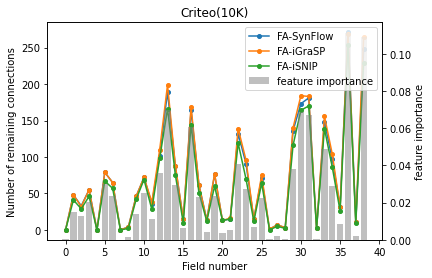

In [6]:
draw_remaining_connections_to_importance(methods_connections, imp_arr)